In [2]:
import numpy as np
import pandas as pd

In [37]:
df=pd.read_csv('odometry/depth_from_video_in_the_wild_odometry_given_intrinsics_trajectory_odo09.txt', sep=' ', header=None)
traj_K_gt=df.to_numpy()
df=pd.read_csv('odometry/depth_from_video_in_the_wild_odometry_learned_intrinsics_trajectory_odo09.txt', sep=' ', header=None)
traj_K_est=df.to_numpy()

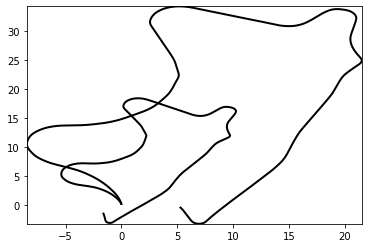

In [45]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# verts = [(p[0], p[1]) for p in traj]
def plot_path(trajs):
    fig, ax = plt.subplots()
    ax_min=100*np.ones(trajs[0].shape[1])
    ax_max=-ax_min
    for traj in trajs:
        assert(traj.shape[1]==2)
        path = Path(traj)
        patch = patches.PathPatch(path, facecolor='none', lw=2)
        ax.add_patch(patch)
        for i in range(traj.shape[1]):
            ax_min[i] = min(ax_min[i], traj[:,i].min())
            ax_max[i] = max(ax_max[i], traj[:,i].max())
    ax.set_xlim(ax_min[0], ax_max[0])
    ax.set_ylim(ax_min[1], ax_max[1])
    plt.show()
    
def pc(traj):
    return np.vstack((traj[:,0], traj[:,2])).transpose()
plot_path([pc(traj) for traj in [traj_K_gt, traj_K_est]])

In [33]:
# for i in range(3):
#     print(i,traj[:, i].min(), traj[:, i].max())


array([[ 0.00000000e+00,  0.00000000e+00],
       [ 1.29013814e-03,  1.96517975e-02],
       [ 2.32073049e-03,  3.96783828e-02],
       ...,
       [ 5.28115758e+00, -4.59035369e-01],
       [ 5.25139412e+00, -4.07844275e-01],
       [ 5.22111945e+00, -3.57235551e-01]])